# Loading ClimateNet Dataset With Xarray

In this notebook, we demonstrate how the ClimateNet dataset can be loaded using the xarray library.

In [2]:
from pathlib import Path

# specify the path to the data and output directories
out_dir = Path('/mnt/data/ai4good/out')
data_dir = Path('/mnt/data/ai4good/climatenet_new')  # expected to have a subfolder 'train' containing the train set
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

## Introduction to Xarray

Xarray is a python library to facilitate working with labelled multi-dimensional arrays.
NetCDF is the recommended file fromat for xarray objects. The xarray Dataset data model is inspired by the one of a netCDF file.

**Resources:**
- [Xarray documentation](https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html)
- [NetCDF CF Metadata Conventions](https://cfconventions.org/cf-conventions/cf-conventions.html)

In [3]:
import xarray as xr

NetCDF files can conveniently be loaded and investigated as an xarray dataset.

In [11]:
example_file = 'data-2000-12-20-01-1_4.nc'
example_ds = xr.load_dataset(train_dir / example_file)  # example dataset containg a single sample

In [12]:
example_ds

<xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2000-12-20-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 0.6404 0.6404 0.6404 ... 1.389 1.389 1.389
    U850     (time, lat, lon) float32 -1.11 -1.092 -1.073 ... -8.836 -8.805
    V850     (time, lat, lon) float32 -3.413 -3.419 -3.425 ... 5.557 5.605 5.653
    UBOT     (time, lat, lon) float32 -1.11 -1.092 -1.073 ... -11.13 -11.14
    VBOT     (time, lat, lon) float32 -3.413 -3.419 -3.425 ... -2.226 -2.165
    QREFHT   (time, lat, lon) float32 0.0003069 0.0003069 ... 8.492e-05
    ...       ...
    TS       (time, lat, lon) float32 241.1 241.1 241.1 ... 231.8 231.8 231.8
    TREFHT   (time, lat, lon) float32 242.4 242.4 242.4 ... 232.5 232.5 232.5
    Z1000    (time, lat, lon) float32 2.839e+03 2.839e+03 ... 138.1 138.1
    Z200     (time, lat, lon) float32 1.084e+04 1.084e+04 ... 1.072e+04
    ZBOT     (time, lat, lon) float32 53.15 53.15 53.15 ... 50.92 50.92 50.92
    LABELS   (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [13]:
example_ds_dims = example_ds.dims
example_ds_coords = example_ds.coords
example_ds_vars = example_ds.data_vars

print(f'Dimensions of the example dataset: {example_ds_dims}\n')
print(f'Coordinates of the example dataset: {example_ds_coords}\n')
print(f'Variables of the example dataset: {example_ds_vars}\n')

Dimensions of the example dataset: Frozen({'lat': 768, 'lon': 1152, 'time': 1})

Coordinates of the example dataset: Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2000-12-20-01-1.nc'

Variables of the example dataset: Data variables:
    TMQ      (time, lat, lon) float32 0.6404 0.6404 0.6404 ... 1.389 1.389 1.389
    U850     (time, lat, lon) float32 -1.11 -1.092 -1.073 ... -8.836 -8.805
    V850     (time, lat, lon) float32 -3.413 -3.419 -3.425 ... 5.557 5.605 5.653
    UBOT     (time, lat, lon) float32 -1.11 -1.092 -1.073 ... -11.13 -11.14
    VBOT     (time, lat, lon) float32 -3.413 -3.419 -3.425 ... -2.226 -2.165
    QREFHT   (time, lat, lon) float32 0.0003069 0.0003069 ... 8.492e-05
    PS       (time, lat, lon) float32 6.886e+04 6.886e+04 ... 1.02e+05 1.02e+05
    PSL      (time, lat, lon) float32 9.958e+04 9.958e+04 ... 1.0

There are four different approaches to [indexing an xarray dataset](https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html#indexing):
- positional and by integer label, like numpy
- loc or "location": positional and coordinate label, like pandas
- isel or "integer select":  by dimension name and integer label
- sel or "select": by dimension name and coordinate label

In [14]:
example_var = 'TMQ'
example_desc = example_ds[example_var].attrs['description']
like_np = example_ds['TMQ'][0,0,0].values
like_pandas = example_ds['TMQ'].loc[
    dict(
        time='data-2000-12-20-01-1.nc',
        lat=-90.0,
        lon=0.0
)].values
isel = example_ds['TMQ'].isel(time=0, lat=0, lon=0).values
sel = example_ds['TMQ'].sel(time='data-2000-12-20-01-1.nc', lat=-90.0, lon=0.0).values

print(f'The different queries for {example_var} return the same value (as they should):')
print(f'like_np: {like_np}')
print(f'like_pandas: {like_pandas}')
print(f'isel: {isel}')
print(f'sel: {sel}')
print(f'\nWe also can print the description of the variable {example_var}:\n{example_desc}')

The different queries for TMQ return the same value (as they should):
like_np: 0.6403516530990601
like_pandas: 0.6403516530990601
isel: 0.6403516530990601
sel: 0.6403516530990601

We also can print the description of the variable TMQ:
total (vertically integrated) precipitable water


Computation on xarray data arrays works just like with numpy.
We can print some useful stats about our labels.

In [15]:
import numpy as np

example_labels = example_ds['LABELS'].values
example_labels_max = np.max(example_labels)
example_labels_min = np.min(example_labels)
example_labels_mean = np.mean(example_labels)
example_labels_std = np.std(example_labels)

print(f'The labels have a maximum value of {example_labels_max}, a minimum value of {example_labels_min}, a mean of {example_labels_mean} and a standard deviation of {example_labels_std}.')

The labels have a maximum value of 2, a minimum value of 0, a mean of 0.1237499095775463 and a standard deviation of 0.4746745549473902.


And just like in pandas, xarray supports gropued operations. The code cell below prints the mean total (vertically integrated) precipitable water for each of the classes.

In [16]:
example_ds['TMQ'].groupby(example_ds['LABELS']).mean()

<xarray.DataArray 'TMQ' (time: 1, LABELS: 3)>
array([[15.53684 , 52.045555, 34.51038 ]], dtype=float32)
Coordinates:
  * time     (time) object 'data-2000-12-20-01-1.nc'
  * LABELS   (LABELS) int64 0 1 2
Attributes:
    description:  total (vertically integrated) precipitable water
    units:         kg/m^2

Last but not least, we can easily plot xarray data arrays as such:

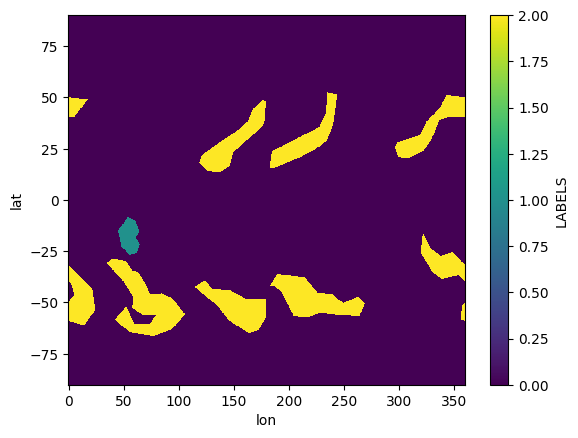

In [10]:
example_ds['LABELS'].plot()